In [1]:
# For execution in google colab
#!git clone https://github.com/Marlup/Simulation-of-investment-and-compound-returns.git

In [1]:
# data processing
import numpy as np
import pandas as pd
# pyplot
from matplotlib import pyplot as plt
# seaborn
import seaborn as sns
# bokeh
from bokeh import plotting as bk
from bokeh.models import Span
from bokeh.io import output_notebook, output_file
from bokeh.models import HoverTool, ColumnDataSource

import compound
# Compound utils
from compound import (
    simulate_compound_return,
    build_dataframe,
    MONTHS_IN_YEAR,
    define_scenario,
    CompoundReturnSimulator,
    plot_scenario_bokeh
)

#output_notebook()
output_file("image.html", title="Investment and Compound Returns")

In [3]:
CURRENCY = "€"
# For execution in google colab
#os.chdir("./Simulation-of-investment-and-compound-returns")

In [4]:
sns.set_style('darkgrid')
sns.color_palette("Paired")
sns.set_palette("Paired")

## Compound return by theoretical function

In [5]:
# Calculation of composed return. Composed return function
principal_amount = 10_000
annual_contribution = 200 * 12
roi = 0.06
duration_years = 60
compounding_frequency = 1

amount, accum_roi = get_compound_return(
    principal_amount,
    roi,
    compounding_frequency,
    annual_contribution,
    duration_years,
    True
    )
print(f"Total amount {amount}")
print(f"Accumulated roi {accum_roi}")

NameError: name 'get_compound_return' is not defined

## Simulation of compound return

### One scenario

In [7]:
# @title Investing parameters for yields scenario

# Define initial parameters
initial_principal = 2500 # @param {type:"number", "min": 0.0, "max": 1.0e8}
monthly_contribution = 100 # @param {type:"number", "min": 0.0, "max": 1.0e8}
annual_contribution = 12 * monthly_contribution
inc_contribution_rate = 0.01 # @param {type:"number", "min": 0.0, "max": 0.1}
annual_roi = 0.18 # @param {type:"number", "min": 0.0, "max": 1.0}
duration_years = 10 # @param {type:"number", "min": 0, "max": 150}
retirement_at_years = 30 # @param {type:"number", "min": 0, "max": 150}
monthly_retirement_income = 2000 # @param {type:"number", "min": 0.0, "max": 1.0e4}
inflation_rate = 0.02 # @param {type:"number", "min": 0.0, "max": 0.2}
tax_rate = 0.2 # @param {type:"number", "min": 0.0, "max": 0.3}
 # Compounding once per year
compounding_frequency = 4 # @param {type:"number", "min": 0, "max": 24}

# Calculate the total balance and earnings using the updated function
total_balance, info = compound.simulate_compound_return(
    principal=initial_principal,
    annual_roi=annual_roi,
    yield_frequency=compounding_frequency,
    annual_contribution=annual_contribution,
    inc_contribution_rate=inc_contribution_rate,
    investment_duration=duration_years,
    retirement_at=retirement_at_years,
    monthly_retirement_income=monthly_retirement_income,
    inflation_rate=inflation_rate,
    tax_rate=tax_rate,
    return_series=True
)

print(f"keys: {info.keys()}")


# Calculate total earnings, total input contribution, and earnings per contribution
balances = info['balances']

earnings = info['net_earnings']
total_earnings = sum(earnings)

contributions = info['contributions']
total_contributions = sum(contributions)

# Print the results
print(f"Total balance after {duration_years} years:", round(total_balance, 2))
print("Total earnings:", round(total_earnings, 2))
print("Total contributions:", round(total_contributions, 2))

# Basic plot setup
renderer_e, renderer_b = plot_scenario_bokeh(earnings, balances, w=800)

_ , _ = bk.show(renderer_e, notebook_handle=True), bk.show(renderer_b, notebook_handle=True)


Argument warning: 'investment_duration' must be greater than 'retirement_at'. retirement_at will be ignored

keys: dict_keys(['stable_yield', 'contributions', 'before_retirement_contributions', 'gross_earnings', 'net_earnings', 'balances', 'tax_from_earnings', 'inflation_from_earnings'])
Total balance after 10 years: 33213.87
Total earnings: 24359.79
Total contributions: 12625.5


In [8]:
info['balances']

[2595.67387687188,
 2691.2717572764195,
 2786.793836992543,
 3049.1697260598667,
 3144.263037894905,
 3239.2815969234225,
 3334.22559708641,
 3628.8159001052377,
 3723.2790493781704,
 3817.6687729571013,
 3911.9852628070053,
 4240.557278786437,
 4214.938246311911,
 4308.845603558107,
 4402.680809433331,
 4760.165367117768,
 4853.418036219422,
 4946.599853707898,
 5039.711007731815,
 5434.631214102665,
 5527.0993092382105,
 5619.498139595924,
 5711.827890918593,
 6146.22818975205,
 6057.505304242732,
 6149.360670173153,
 6241.148143897684,
 6706.7137214495715,
 6797.7439221540235,
 6888.707816180022,
 6979.60558481972,
 7488.516944985504,
 7578.587365932735,
 7668.593361387451,
 7758.535109748558,
 8313.15033318902,
 8152.522723557269,
 8241.916232691532,
 8331.246799245027,
 8919.557668951953,
 9007.932524271311,
 9096.246346616921,
 9184.499309218963,
 9822.844621904209,
 9910.06098772814,
 9997.218535251315,
 10084.317434258157,
 10775.410146545617,
 10532.927231559048,
 10619.394317

High yield with low contribution

In [28]:
# @title Investing parameters for yields scenario

# Define initial parameters
initial_principal = 2500 # @param {type:"number", "min": 0.0, "max": 1.0e8}
monthly_contribution = 100 # @param {type:"number", "min": 0.0, "max": 1.0e8}
annual_contribution = 12 * monthly_contribution
inc_contribution_rate = 0.01 # @param {type:"number", "min": 0.0, "max": 0.1}
annual_roi = 0.20 # @param {type:"number", "min": 0.0, "max": 1.0}
duration_years = 60 # @param {type:"number", "min": 0, "max": 150}
retirement_at_years = 15 # @param {type:"number", "min": 0, "max": 150}
monthly_retirement_income = 800 # @param {type:"number", "min": 0.0, "max": 1.0e4}
inflation_rate = 0.03 # @param {type:"number", "min": 0.0, "max": 0.2}
tax_rate = 0.2 # @param {type:"number", "min": 0.0, "max": 0.3}
 # Compounding once per year
compounding_frequency = 6 # @param {type:"number", "min": 0, "max": 24}

# Calculate the total balance and earnings using the updated function
total_balance, info = simulate_compound_return(
    principal=initial_principal,
    annual_roi=annual_roi,
    yield_frequency=compounding_frequency,
    annual_contribution=annual_contribution,
    inc_contribution_rate=inc_contribution_rate,
    investment_duration=duration_years,
    retirement_at=retirement_at_years,
    monthly_retirement_income=monthly_retirement_income,
    inflation_rate=inflation_rate,
    tax_rate=tax_rate,
    return_series=True
)

balances = info['balances']
earnings = info['net_earnings']
contributions = sum(info['contributions'])

# Calculate total earnings, total input contribution, and earnings per contribution
total_earnings = sum(earnings)

# Print the results
print(f"Total balance after {duration_years} years:", round(total_balance, 2))
print("Total earnings:", round(total_earnings, 2))
print("Total contribution:", round(contributions, 2))

# Basic plot setup
renderer_e, renderer_b = plot_scenario_bokeh(earnings, balances)

bk.show(renderer_e), bk.show(renderer_b)

Total balance after 60 years: -156383.75
Total earnings: 1320838.07
Total contribution: 19427.58


(None, None)

In [ ]:
bk.show(renderer_e)

In [41]:
bk.show(renderer_b)

In [11]:
info.keys()

dict_keys(['stable_yield', 'contributions', 'before_retirement_contributions', 'gross_earnings', 'net_earnings', 'balances', 'tax_from_earnings', 'inflation_from_earnings'])

In [13]:
info["contributions"]

[100.08333333333333,
 100.1667361111111,
 100.2502083912037,
 100.3337502315297,
 100.41736169005598,
 100.5010428247977,
 100.58479369381836,
 100.66861435522988,
 100.75250486719257,
 100.83646528791523,
 100.92049567565516,
 101.0045960887182,
 101.0887665854588,
 101.17300722428001,
 101.25731806363358,
 101.34169916201994,
 101.42615057798828,
 101.5106723701366,
 101.59526459711172,
 101.67992731760931,
 101.76466059037399,
 101.84946447419931,
 101.9343390279278,
 102.01928431045108,
 102.10430038070979,
 102.18938729769371,
 102.27454512044179,
 102.35977390804216,
 102.44507371963219,
 102.53044461439855,
 102.61588665157721,
 102.70139989045353,
 102.78698439036224,
 102.87264021068754,
 102.9583674108631,
 103.04416605037216,
 103.13003618874747,
 103.21597788557142,
 103.30199120047607,
 103.38807619314314,
 103.47423292330409,
 103.56046145074018,
 103.64676183528246,
 103.73313413681187,
 103.81957841525922,
 103.90609473060526,
 103.99268314288076,
 104.0793437121665,
 1

### Multi-scenarios

In [14]:
step_amount = 5_000
max_amount = 20_000
initial_amounts = np.arange(step_amount,
                            max_amount + step_amount,
                            step_amount)
terms = [1, 6, 12]
virtual_returns = np.arange(0.06, 0.1, 0.01).tolist()
annual_contributions = list(map(lambda x: 12 * x, range(50, 500, 50)))
inc_contributions = [0.01, 0.03, 0.05, 0.1]
years_of_investment = [40, 50, 60]#np.arange(30, 30 + 5, 5)
inflation_rates = [0.02, 0.03, 0.04]#np.arange(30, 30 + 5, 5)
retirement_years = [30]
monthly_retirement_incomes = [
    0.5e3,
    1.0e3,
    1.5e3,
    2.0e3
    ]
#tax_rate = [0.25]
tax_rate = ["spain"]
retirement_contribution_rate = [0.1]

results = define_scenario(initial_amounts,
                          virtual_returns,
                          years_of_investment,
                          terms,
                          annual_contributions,
                          inc_contributions,
                          inflation_rates,
                          monthly_retirement_incomes,
                          retirement_years,
                          tax_rate
                          )

df = build_dataframe(results)
df

,initial_amount,roi,duration,frequency,contribution,inc_contribution,inflation_rate,monthly_retirement_income,retirement_at,tax_rate,stable_yield,total_amount
0,5000,0.06,40,1,600,0.01,0.02,500.0,30,spain,False,-9.982052e+03
1,5000,0.06,40,1,600,0.01,0.02,1000.0,30,spain,False,-6.908476e+04
2,5000,0.06,40,1,600,0.01,0.02,1500.0,30,spain,False,-1.251166e+05
3,5000,0.06,40,1,600,0.01,0.02,2000.0,30,spain,False,-1.803981e+05
4,5000,0.06,40,1,600,0.01,0.03,500.0,30,spain,False,-2.027159e+04
...,...,...,...,...,...,...,...,...,...,...,...,...
77755,20000,0.10,60,12,5400,0.10,0.03,2000.0,30,spain,NaN,5.029542e+06
77756,20000,0.10,60,12,5400,0.10,0.04,500.0,30,spain,NaN,4.086391e+06
77757,20000,0.10,60,12,5400,0.10,0.04,1000.0,30,spain,NaN,3.770956e+06
77758,20000,0.10,60,12,5400,0.10,0.04,1500.0,30,spain,NaN,3.454791e+06


## Investment scenarios

### Filter the scenarios to adapt to a certain investor

- Initial amount: 10k to 15k
- Maximum return of investment (ROI): 10%
- Maximum term (months): 12
- Annual contribution: 1.2k to 3.8k
- Investment total period (years): 60
- Monthly income after retirement: 500 to 2000
- Annual inflation rate: 2 to 4 %

Final balance must be positive

In [16]:
# Filter cases
initial_amounts = (10_000, 15_000)
max_roi = 0.1
max_term = 12
contributions = (1200, 3800)
#inc_contributions = (0.01, 0.1)
min_years = 60
monthly_retirement_incomes = (500, 2000)
inflation_rates = (0.02, 0.04)

df_positive = df[df["total_amount"] > 0.0]
# Round up 'total_amount'
df_positive["total_amount"] = df_positive["total_amount"].round(1)
print('Cases with positive amount:', df_positive.shape)

# Filter by example case
df_case = df_positive[(df_positive["initial_amount"].between(initial_amounts[0], initial_amounts[1])) & \
                      (df_positive["roi"] <= max_roi) & \
                      (df_positive["frequency"] <= max_term) & \
                      (df_positive["contribution"].between(contributions[0], contributions[1])) & \
                      #(df_positive["inc_contribution"].between(inc_contributions[0], inc_contributions[1])) & \
                      (df_positive["duration"] >= min_years) & \
                      (df_positive["monthly_retirement_income"].between(monthly_retirement_incomes[0], monthly_retirement_incomes[1])) & \
                      ((df_positive["inflation_rate"].between(inflation_rates[0], inflation_rates[1])))
                      ].sort_values(["roi", "frequency", "total_amount", "monthly_retirement_income", "contribution"],
                                    ascending=[True, True, False, False, False])
df_case

Cases with positive amount: (54586, 12)


C:\Users\marlo\AppData\Local\Temp\ipykernel_17912\3840058416.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive["total_amount"] = df_positive["total_amount"].round(1)


,initial_amount,roi,duration,frequency,contribution,inc_contribution,inflation_rate,monthly_retirement_income,retirement_at,tax_rate,stable_yield,total_amount
41748,15000,0.06,60,1,3600,0.10,0.02,500.0,30,spain,True,1777190.2
22308,10000,0.06,60,1,3600,0.10,0.02,500.0,30,spain,True,1751798.0
41749,15000,0.06,60,1,3600,0.10,0.02,1000.0,30,spain,True,1503955.1
22309,10000,0.06,60,1,3600,0.10,0.02,1000.0,30,spain,True,1478562.9
41700,15000,0.06,60,1,3000,0.10,0.02,500.0,30,spain,True,1457338.6
...,...,...,...,...,...,...,...,...,...,...,...,...
38649,10000,0.10,60,12,3000,0.01,0.04,1000.0,30,spain,NaN,13385.1
38558,10000,0.10,60,12,1800,0.03,0.02,1500.0,30,spain,NaN,11267.6
38707,10000,0.10,60,12,3600,0.03,0.03,2000.0,30,spain,NaN,11224.7
38710,10000,0.10,60,12,3600,0.03,0.04,1500.0,30,spain,NaN,10228.6


The financial outcomes the investor want

In [17]:
case_ini_amount = 10_000
case_years = 60

case_monthly_contribution = 200
case_annual_contribution = case_monthly_contribution * MONTHS_IN_YEAR
retir_income = 1000

In [18]:
three_cases = df[(df["initial_amount"] == case_ini_amount) & \
                 (df["duration"] == case_years) & \
                 (df["contribution"] == case_annual_contribution) & \
                 (df["monthly_retirement_income"] == retir_income)
                ]
three_cases.head()

,initial_amount,roi,duration,frequency,contribution,inc_contribution,inflation_rate,monthly_retirement_income,retirement_at,tax_rate,stable_yield,total_amount
22177,10000,0.06,60,1,2400,0.01,0.02,1000.0,30,spain,False,-147854.777413
22181,10000,0.06,60,1,2400,0.01,0.03,1000.0,30,spain,False,-168174.103974
22185,10000,0.06,60,1,2400,0.01,0.04,1000.0,30,spain,False,-169318.643273
22189,10000,0.06,60,1,2400,0.03,0.02,1000.0,30,spain,False,-89355.619779
22193,10000,0.06,60,1,2400,0.03,0.03,1000.0,30,spain,False,-137279.840263


### Three result cases

Pesimistic case:
- €10,000 initial amount
- 30 years of investment duration
- 12 months term
- €200 monthly contribution
- 1 % annual contribution increment
- €1,000 of retirement income
- 10 % of income from retirement to contribution
- 4 % mean inflation rate

Number of cases: 5


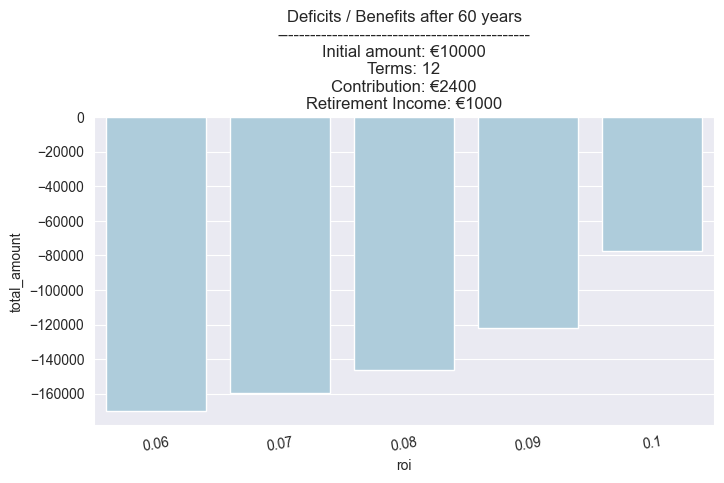

In [19]:
case_terms = 12
inc_contribution = 0.01
inflation_rate = 0.04

case_rois = three_cases[
    (three_cases["frequency"] == case_terms) & \
    (three_cases["monthly_retirement_income"] == retir_income) & \
    (three_cases["inc_contribution"] == inc_contribution) & \
    (three_cases["inflation_rate"] == inflation_rate)
][["roi", "total_amount"]].round(2)

print(f"Number of cases: {case_rois.shape[0]}")

plt.figure(figsize=(8, 4))
_ = sns.barplot(data=case_rois,
                x="roi",
                y="total_amount",
               )

title = f"Initial amount: {CURRENCY}{case_ini_amount}\nTerms: {case_terms}\nContribution: {CURRENCY}{case_annual_contribution}\nRetirement Income: {CURRENCY}{retir_income}"
_ = plt.title(f"Deficits / Benefits after {case_years} years\n----------------------------------------------\n"+ title)
_ = plt.xticks(rotation=10)

Moderated case:
- €10,000 initial amount
- 30 years of investment duration
- 12 months term
- €200 monthly contribution
- 3 % annual contribution increment
- €1,000 of retirement income
- 10 % of income from retirement to contribution
- 3 % mean inflation rate

Number of cases: 5


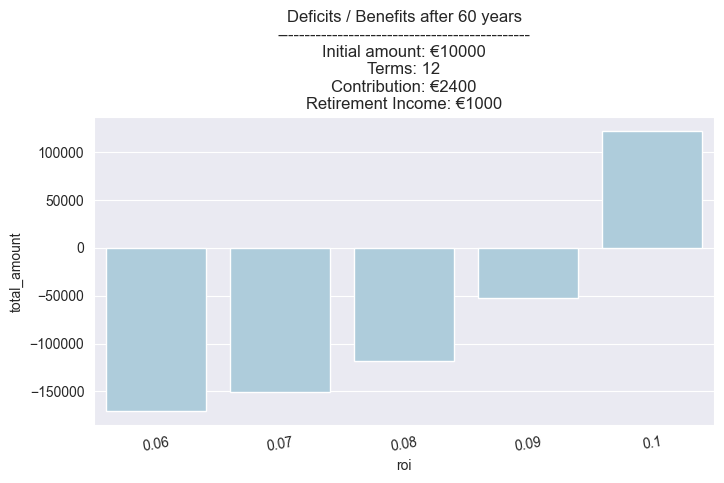

In [20]:
case_terms = 12
inc_contribution = 0.01
inflation_rate = 0.03

case_rois = three_cases[
    (three_cases["frequency"] == case_terms) & \
    (three_cases["monthly_retirement_income"] == retir_income) & \
    (three_cases["inc_contribution"] == inc_contribution) & \
    (three_cases["inflation_rate"] == inflation_rate)
][["roi", "total_amount"]].round(2)

print(f"Number of cases: {case_rois.shape[0]}")

plt.figure(figsize=(8, 4))
_ = sns.barplot(data=case_rois,
                x="roi",
                y="total_amount",
               )

title = f"Initial amount: {CURRENCY}{case_ini_amount}\nTerms: {case_terms}\nContribution: {CURRENCY}{case_annual_contribution}\nRetirement Income: {CURRENCY}{retir_income}"
_ = plt.title(f"Deficits / Benefits after {case_years} years\n----------------------------------------------\n"+ title)
_ = plt.xticks(rotation=10)

Optimistic case:
- €10,000 initial amount
- 30 years of investment duration
- 1 months term
- €200 monthly contribution
- 5 % annual contribution increment
- €1,000 of retirement income
- 10 % of retirement income to contribution
- 2 % mean inflation rate

Number of cases: 5


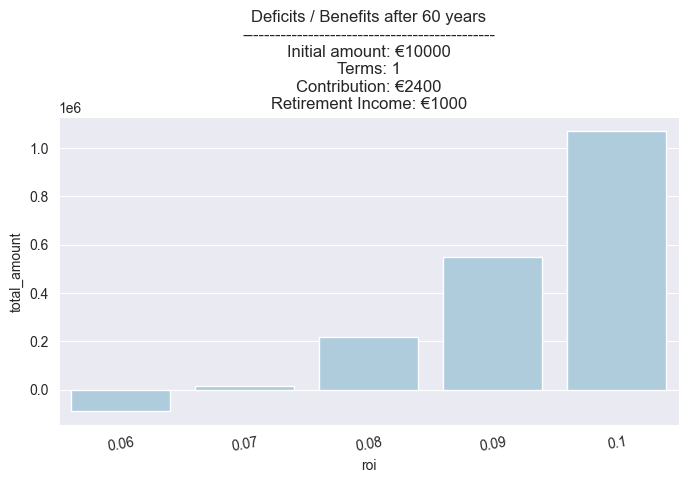

In [21]:
case_terms = 1
inc_contribution = 0.03
inflation_rate = 0.02

case_rois = three_cases[
    (three_cases["frequency"] == case_terms) & \
    (three_cases["monthly_retirement_income"] == retir_income) & \
    (three_cases["inc_contribution"] == inc_contribution) & \
    (three_cases["inflation_rate"] == inflation_rate)
][["roi", "total_amount"]].round(2)

print(f"Number of cases: {case_rois.shape[0]}")

plt.figure(figsize=(8, 4))
_ = sns.barplot(data=case_rois,
                x="roi",
                y="total_amount",
               )

title = f"Initial amount: {CURRENCY}{case_ini_amount}\nTerms: {case_terms}\nContribution: {CURRENCY}{case_annual_contribution}\nRetirement Income: {CURRENCY}{retir_income}"
_ = plt.title(f"Deficits / Benefits after {case_years} years\n----------------------------------------------\n"+ title)
_ = plt.xticks(rotation=10)

In [2]:
sim = CompoundReturnSimulator(
    principal=10_000,
    annual_roi=0.06,
    investment_duration=40,
    retirement_at=30,
    inflation_rate=0.025,
    tax="spain",
    return_series=True
)

final_balance, result_info = sim.simulate()

In [4]:
final_balance, result_info

(-32746.027390526204,
 {'contributions': [8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.3333333333